# Airline Analysis

In this project, we'll help a travel agency find the best deal for their clients, and we'll understand how ticket prices change based on different factors.

Columns description:

- `miles`: miles traveled through the flight;
- `passengers`: number of passengers on the flight;
- `delay`: take-off delay in minutes;
- `inflight_meal`: meal is included or not;
- `inflight_entertainment`: free entertainment systems for each seat is included or not;
- `inflight_wifi`: complimentary wifi on the flight is included or not;
- `day_of_week`: day of the week of the flight;
- `weekend`: does this flight take place on a weekend or not;
- `coach_price`: the average price paid for a coach ticket ($);
- `firstclass_price`: the average price paid for first-class seats ($);
- `hours`: how many hours the flight took;
- `redeye`: is it an overnight flight or not.

### Investigate and Clean

Firstly, we'll import necessary libraries and uploas a dataset to a `flights` variable. 


In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math


# Read in Data
flights = pd.read_csv("flight.csv")
flights

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2
...,...,...,...,...,...,...,...,...,...,...,...,...
129775,674,217,1487,No,Yes,Yes,Friday,No,Yes,383.240,1478.70,1
129776,2125,208,1479,No,Yes,Yes,Friday,No,Yes,397.825,1616.01,4
129777,1702,220,1501,No,Yes,Yes,Friday,No,Yes,380.980,1481.49,3
129778,2709,205,1484,No,Yes,Yes,Saturday,No,Yes,485.185,1589.70,5


Now let's check `flights` data types. Judging by several columns with binary categorical variables there is a chance that we'll need them and some other data to be of other type than they are now. 

In [42]:
flights.dtypes

miles                       int64
passengers                  int64
delay                       int64
inflight_meal              object
inflight_entertainment     object
inflight_wifi              object
day_of_week                object
redeye                     object
weekend                    object
coach_price               float64
firstclass_price          float64
hours                       int64
dtype: object

We are going to change the type of `day_of_week` feature. It will get a type `category`. 

In [43]:
# Get a full list of unique items in column
flights.day_of_week.unique()

array(['Sunday', 'Friday', 'Saturday', 'Monday', 'Wednesday', 'Tuesday',
       'Thursday'], dtype=object)

In [44]:
# Change column type to categor
flights['day_of_week'] = pd.Categorical(
    flights['day_of_week'], 
    ['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday'], 
    ordered=True)

Now we are going to convert binary categorical variables to integers.


In [64]:
# Create convertation function
def convert_to_binary(dataset, list_of_columns):
    for i in list_of_columns:
        dataset[i] = pd.Categorical(dataset[i], ['No', 'Yes'], ordered=True)
        dataset[i] = dataset[i].cat.codes
    return dataset

In [65]:
# Call convertation function
convert_to_binary(flights, ['inflight_meal', 'inflight_entertainment', 'inflight_wifi', 'redeye', 'weekend'])

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,-1,-1,-1,Sunday,-1,-1,338.820,1571.02,1
1,3163,214,0,-1,-1,-1,Sunday,-1,-1,472.655,1663.70,6
2,1832,212,0,-1,-1,-1,Friday,-1,-1,351.960,1429.86,3
3,925,213,0,-1,-1,-1,Saturday,-1,-1,387.835,1558.76,2
4,967,217,0,-1,-1,-1,Monday,-1,-1,374.735,1245.58,2
...,...,...,...,...,...,...,...,...,...,...,...,...
129775,674,217,1487,-1,-1,-1,Friday,-1,-1,383.240,1478.70,1
129776,2125,208,1479,-1,-1,-1,Friday,-1,-1,397.825,1616.01,4
129777,1702,220,1501,-1,-1,-1,Friday,-1,-1,380.980,1481.49,3
129778,2709,205,1484,-1,-1,-1,Saturday,-1,-1,485.185,1589.70,5


Check what we have got in the end. 

In [47]:
flights.dtypes

miles                        int64
passengers                   int64
delay                        int64
inflight_meal                 int8
inflight_entertainment        int8
inflight_wifi                 int8
day_of_week               category
redeye                        int8
weekend                       int8
coach_price                float64
firstclass_price           float64
hours                        int64
dtype: object

Let's check out some general statistics over all features.

In [48]:
flights.describe()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,redeye,weekend,coach_price,firstclass_price,hours
count,129780.000000,129780.000000,129780.000000,129780.000000,129780.000000,129780.000000,129780.000000,129780.000000,129780.000000,129780.000000,129780.000000
mean,2006.224696,207.723155,13.162845,0.300254,0.801572,0.899723,0.049669,0.652204,376.585253,1454.931785,3.631214
std,943.034768,12.776363,41.941680,0.458370,0.398818,0.300371,0.217260,0.476273,67.744274,162.590434,1.739118
min,12.000000,135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.415000,939.100000,1.000000
25%,1343.000000,204.000000,9.000000,0.000000,1.000000,1.000000,0.000000,0.000000,331.445000,1302.200000,2.000000
50%,1986.000000,210.000000,10.000000,0.000000,1.000000,1.000000,0.000000,1.000000,380.560000,1503.840000,4.000000
75%,2468.000000,215.000000,13.000000,1.000000,1.000000,1.000000,0.000000,1.000000,426.676250,1582.370000,4.000000
max,4548.000000,244.000000,1560.000000,1.000000,1.000000,1.000000,1.000000,1.000000,593.635000,1846.780000,8.000000


Result: values looks fine, so we are: "Cocked, Locked and Ready to Rock!"

### Univariate Analysis

Now we'll answer on some questions: 
- What do coach ticket prices look like? 
- What are the high and low values? 
- What would be considered average? 
- Does $500 seem like a good price for a coach ticket?

To answer them we need to create some visualisations: histogram and boxplot would be valuable. Let's do both. 

In [49]:
# Create histogram function
def visualise_histplot(dataset, column_name, bars_color, xlabel):    
    plt.figure(figsize=(15,10))
    ax = sns.histplot(dataset[column_name], stat='count', color=bars_color, legend=True, bins=30, linewidth=0.1)
    # Add Mean
    plt.axvline(x = dataset[column_name].mean(), color='Tomato')
    # Add Median
    plt.axvline(x = dataset[column_name].median(), color='MediumPurple')

    # Add descriptions
    ax.legend( 
    title_fontsize='large', 
    loc='best', 
    labels=['Mean', 'Median', xlabel], 
    fontsize = 'large')

    # ax.set_title('Coach Prices', fontsize = 'x-large')
    ax.set_xlabel(xlabel, fontsize = 'large')
    ax.set_ylabel('Count', fontsize = 'large')
    return plt.show()

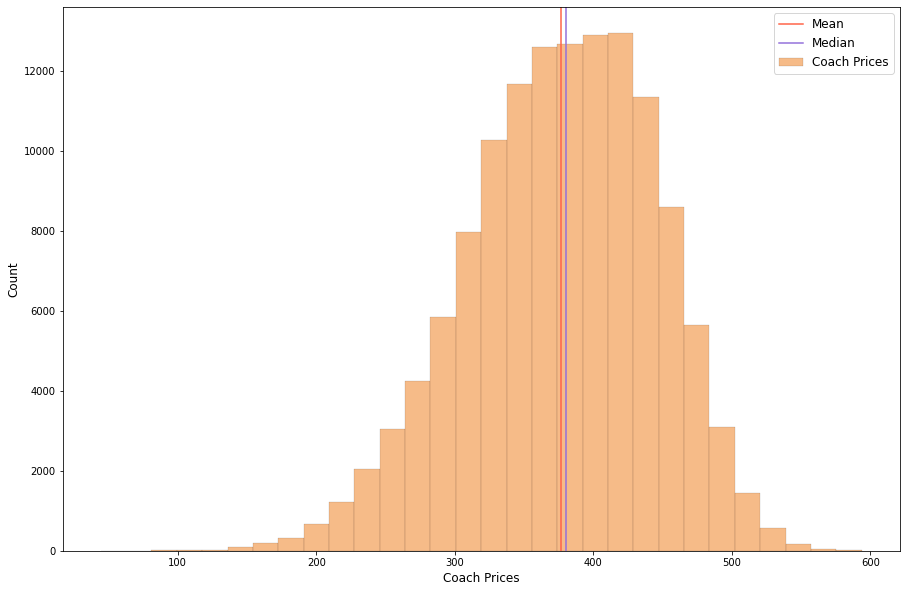

In [66]:
# Call histogram function
visualise_histplot(dataset=flights, column_name='coach_price', bars_color='SandyBrown', xlabel='Coach Prices')

In [67]:
# Create boxplot function
def visualise_boxplot(dataset, column_name, color, xlabel):
    plt.figure(figsize=(15,10))
    ax = sns.boxplot(x=dataset[column_name], 
    color=color,
    # Add mean as +
    showmeans=True,
    meanprops={"marker": "+",
        "markeredgecolor": "black",
        "markersize": "10"})
        
    # Add x label    
    ax.set_xlabel(xlabel, fontsize = 'large')

    return plt.show()

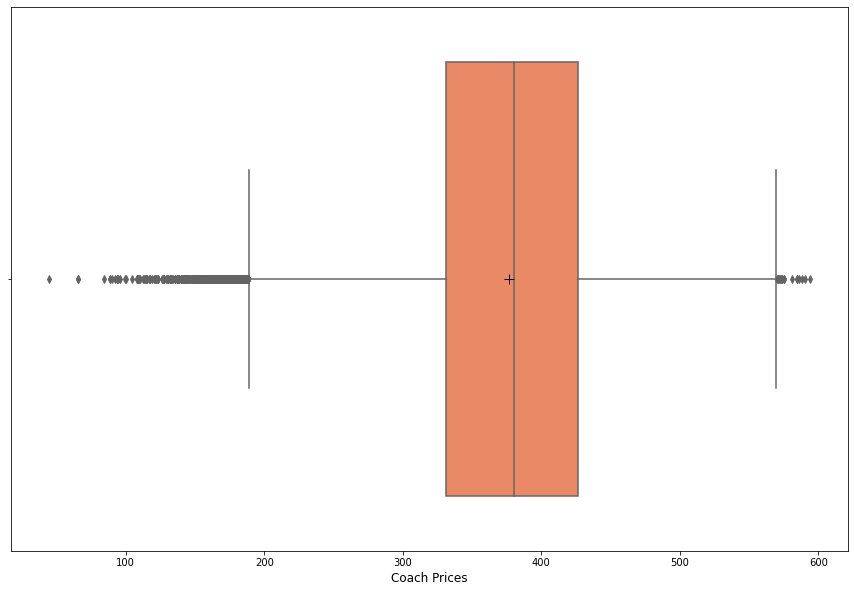

In [68]:
# Call boxplot function
visualise_boxplot(flights, column_name='coach_price', color='Coral', xlabel='Coach Prices')

Result: 
- High values are `500-600$`;
- Low: `100-200$`;
- Average `380-390$`;
- $500 seems like a high price for a coach ticket, at least considering all available flights.

Now we'll think about where $500 falls for flights that are 8 hours long: Is it close to the mean or median (in the center of the histogram or box plot)? Or is it far away (in the tail of the histogram or box plot)? What are the high, low, and average prices for 8-hour-long flights?

Let's filter the dataset to get a slice with flights that take `8` or more hours. 

In [53]:
# Apply filter to hours to get long flights
more_than8h = flights[flights.hours >= 8]
# Find mean of this slice
more_than8h.coach_price.mean()

431.834377372817

Mean is considerably higher for long flights. Let's check how prices will look on a histplot. 

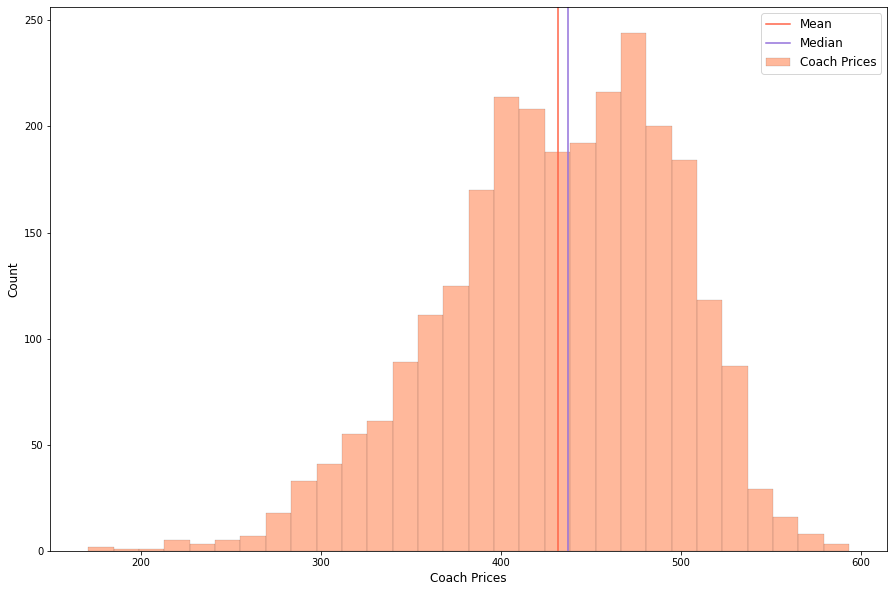

In [54]:
visualise_histplot(dataset=more_than8h, column_name='coach_price', bars_color='LightSalmon', xlabel='Coach Prices')

In [55]:
more_than8h.coach_price.describe()

count    2634.000000
mean      431.834377
std        64.083280
min       170.770000
25%       390.266250
50%       437.115000
75%       480.043750
max       593.635000
Name: coach_price, dtype: float64

Once you’ve correctly plotted coach ticket prices for flights that are 8 hours long as well as some summary statistics, think about where $500 now falls in the distribution: Is it close or far from the center of the plot? Is $500 closer to the summary statistics than it was before? This would indicate a more normal or reasonable price.

In [56]:
more_than150pass= flights[flights.passengers <= 200]

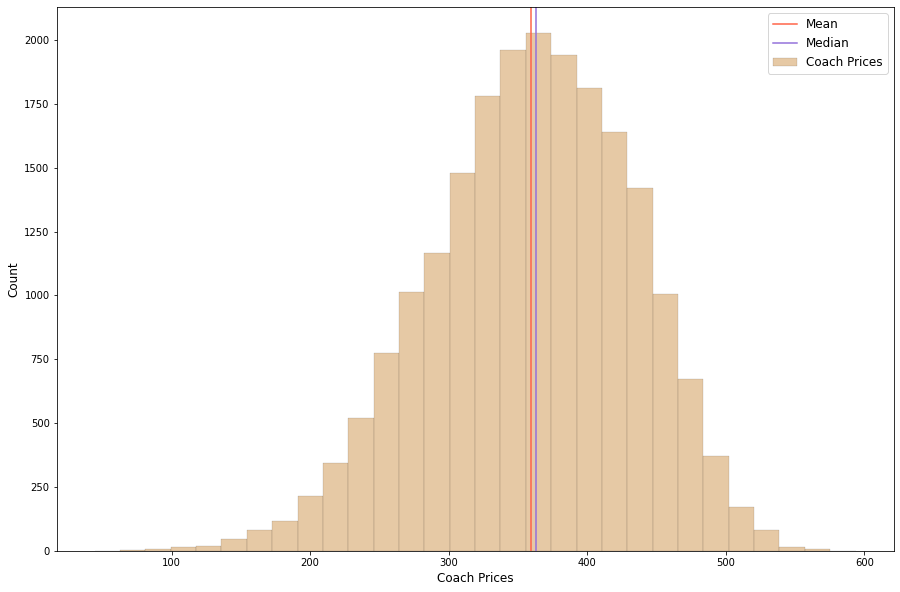

In [57]:
visualise_histplot(dataset=more_than150pass, column_name='coach_price', bars_color='BurlyWood', xlabel='Coach Prices')

How are flight delay times distributed? Let’s say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

In [58]:
more_than1000=flights[flights.delay > 1000]
less_than1000=flights[flights.delay < 1000]


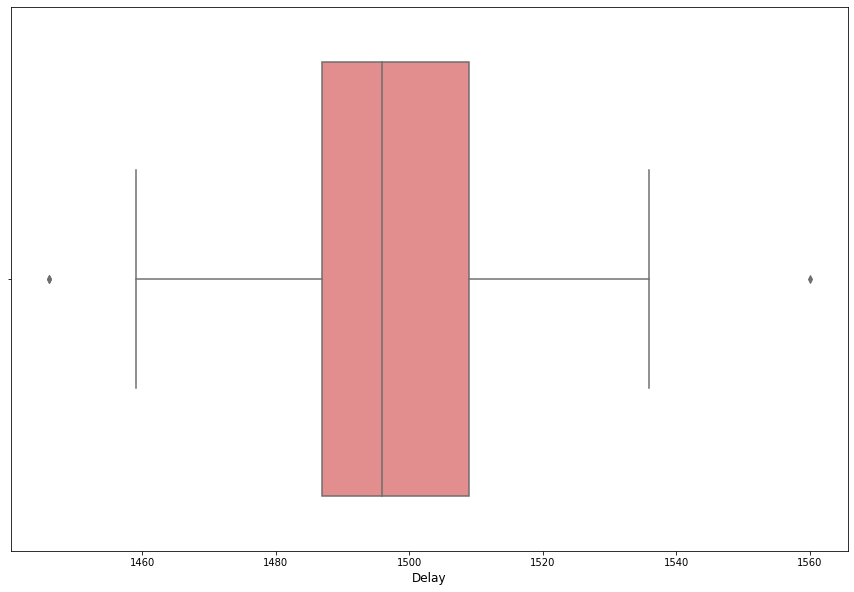

In [59]:
visualise_boxplot(more_than1000, column_name='delay', color='LightCoral', xlabel='Delay')

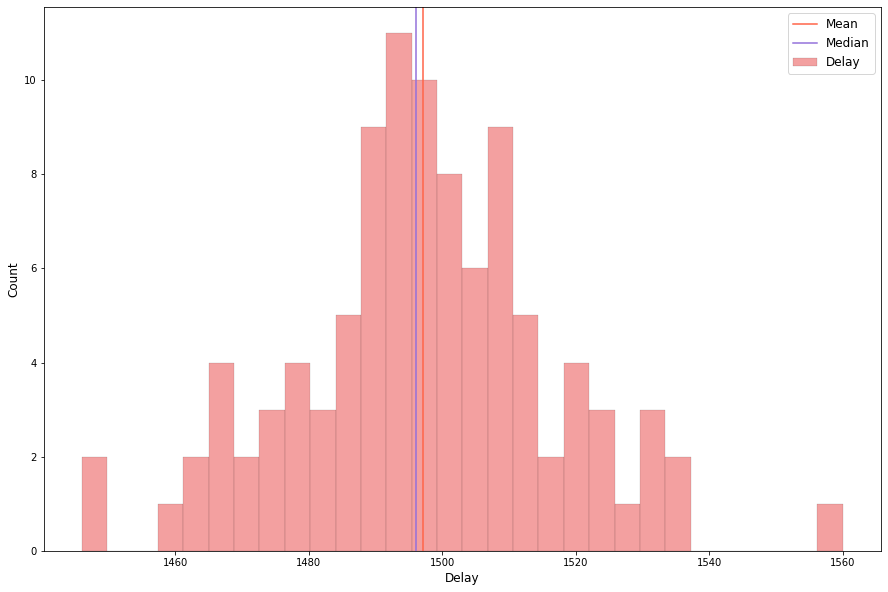

In [60]:
visualise_histplot(dataset=more_than1000, column_name='delay', bars_color='LightCoral', xlabel='Delay')

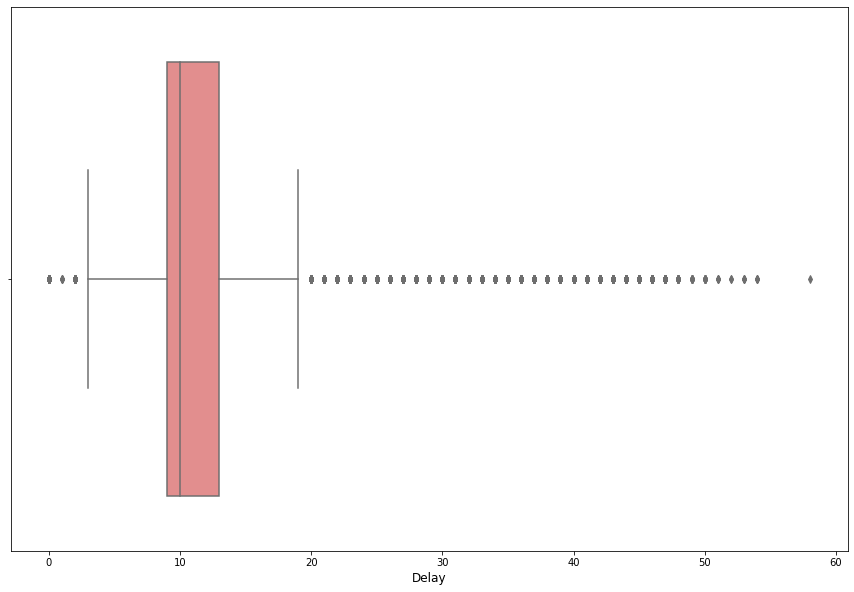

In [61]:
visualise_boxplot(less_than1000, column_name='delay', color='LightCoral', xlabel='Delay')

If you plot a histogram of flight delay times, you’ll see that this visualization is difficult to read because of extreme outliers. Try subsetting the data to only include flight delays at a lower, more reasonable value to be able to see the distribution. Use the method mentioned in the hint of Task 2 to subset your data to specific ranges.
It may take some trial-and-error to settle on a value as your cut-off, so you may have to try a few different values until one seems right.
After subsetting the data by delay times, we can see that a 10-minute delay is fairly common for this airline. You will want to keep that in consideration when setting up a connecting flight.

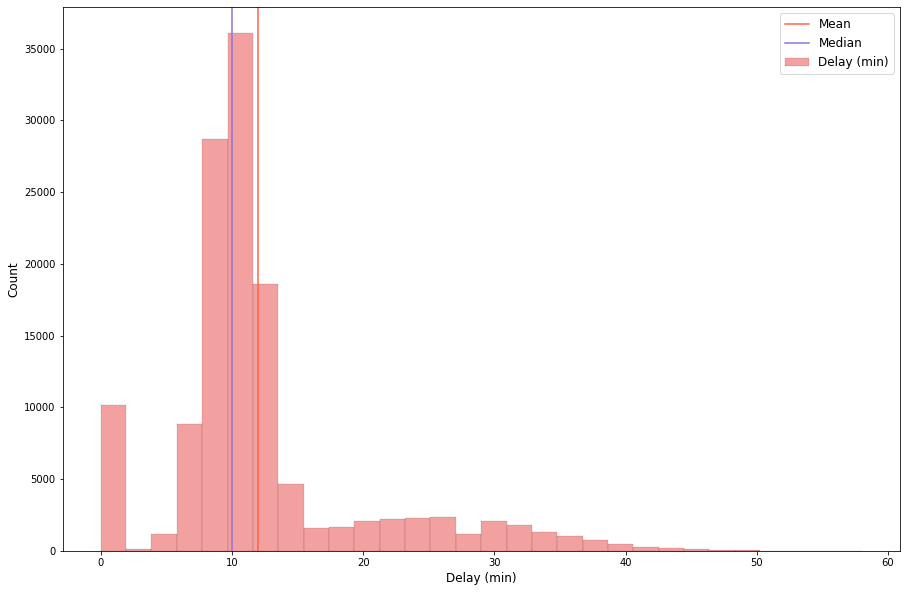

In [62]:
visualise_histplot(dataset=less_than1000, column_name='delay', bars_color='LightCoral', xlabel='Delay (min)')

### Bivariate Analysis

Let's create a visualization that shows the relationship between coach and first-class prices, to understand whether flights with higher coach prices always have higher first-class prices as well.

If we make a scatterplot between `coach_price` and `firstclass_price`, we will see that there are too many data points which makes it difficult to see the nuanced relationship between these two features. To mitigate it we will change the opacity of the points to see if the mass of data points is extra packed in a certain area. Taking a random sample from the data set to see what a less busy version of this plot may look like will also be helpful. But our best remedy will be adding a LOWESS smoother through the plot - that will show the changes on the regression line directly. 

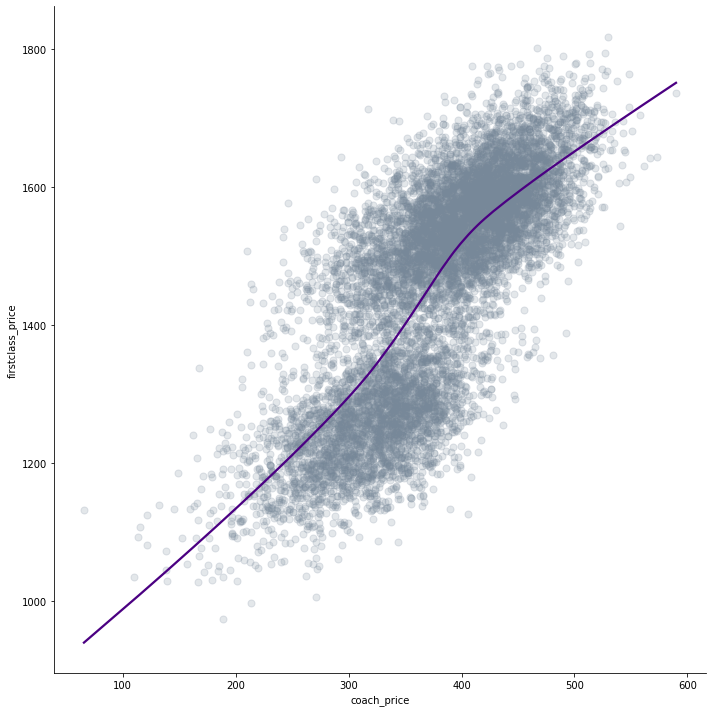

In [63]:
sns.lmplot(
    x = 'coach_price', 
    y = 'firstclass_price', 
    data=flights.sample(n=10000),
    line_kws={'color': 'Indigo'}, 
    scatter_kws={'color': 'LightSlateGrey', 's':50,'alpha':0.2},
    height=10,
    lowess=True)


This shows the relationship between the features on the x and y-axis.

To be continued